In [87]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)
import numpy as np


In [88]:
df1=pd.DataFrame()
df2=pd.DataFrame()

df1 = pd.read_csv('REC_SALES.csv',index_col='Date',parse_dates=True)
df2 = pd.read_csv('REC_POP.csv',index_col='Date',parse_dates=True)


C:\Users\Kaushik\AppData\Local\Temp\ipykernel_14884\1734760765.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1 = pd.read_csv('REC_SALES.csv',index_col='Date',parse_dates=True)


<Axes: xlabel='Date'>

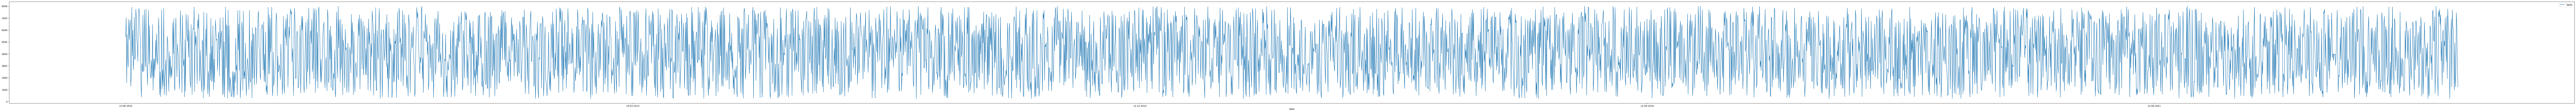

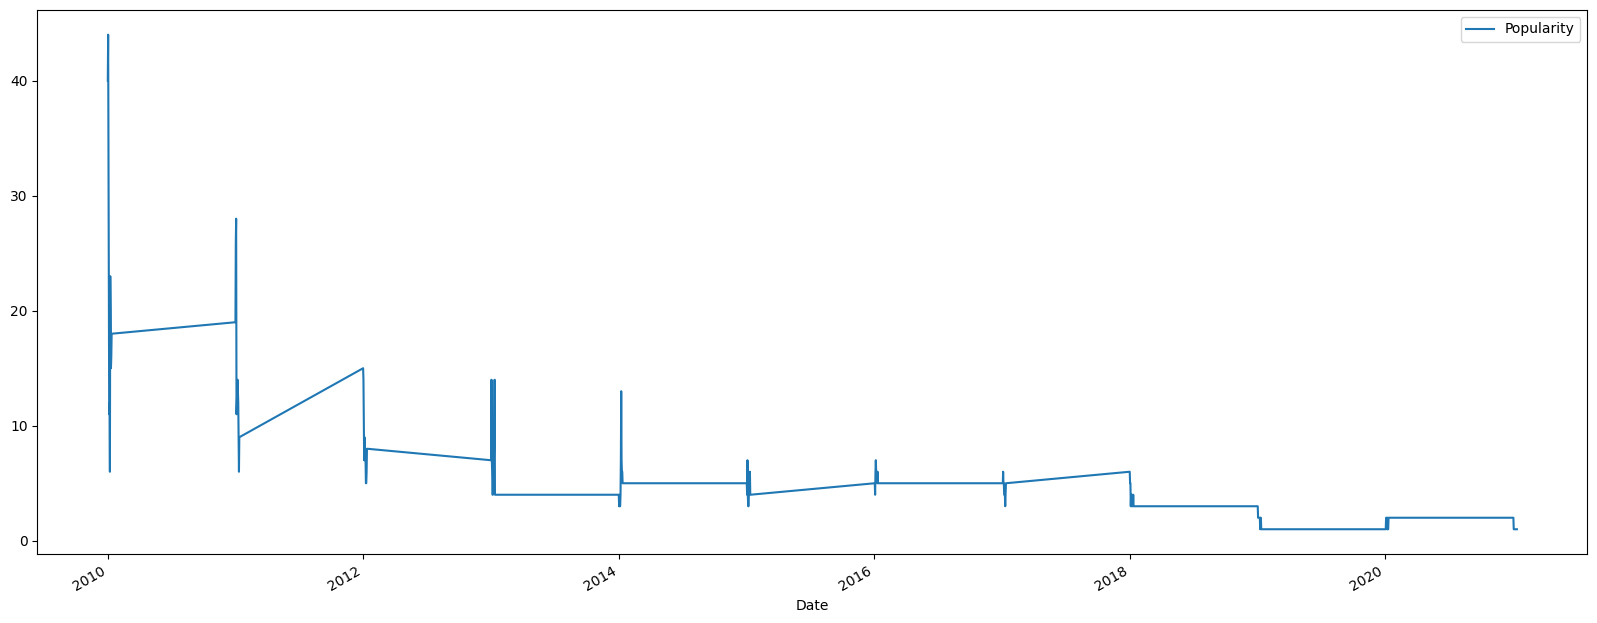

In [89]:
df1.columns = ['Sales']
df1.plot(figsize=(200,8))

df2.columns = ['Popularity']
df2.plot(figsize=(20,8))

In [90]:
df1['Sale_LastMonth']=df1['Sales'].shift(+1)
df1['Sale_2Monthsback']=df1['Sales'].shift(+2)
df1['Sale_3Monthsback']=df1['Sales'].shift(+3)
df1=df1.dropna()

df2['Pop_LastMonth']=df2['Popularity'].shift(+1)
df2['Pop_2Monthsback']=df2['Popularity'].shift(+2)
df2['Pop_3Monthsback']=df2['Popularity'].shift(+3)
df2=df2.dropna()

C:\Users\Kaushik\AppData\Local\Temp\ipykernel_14884\4164438578.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(sx_train,sy_train)


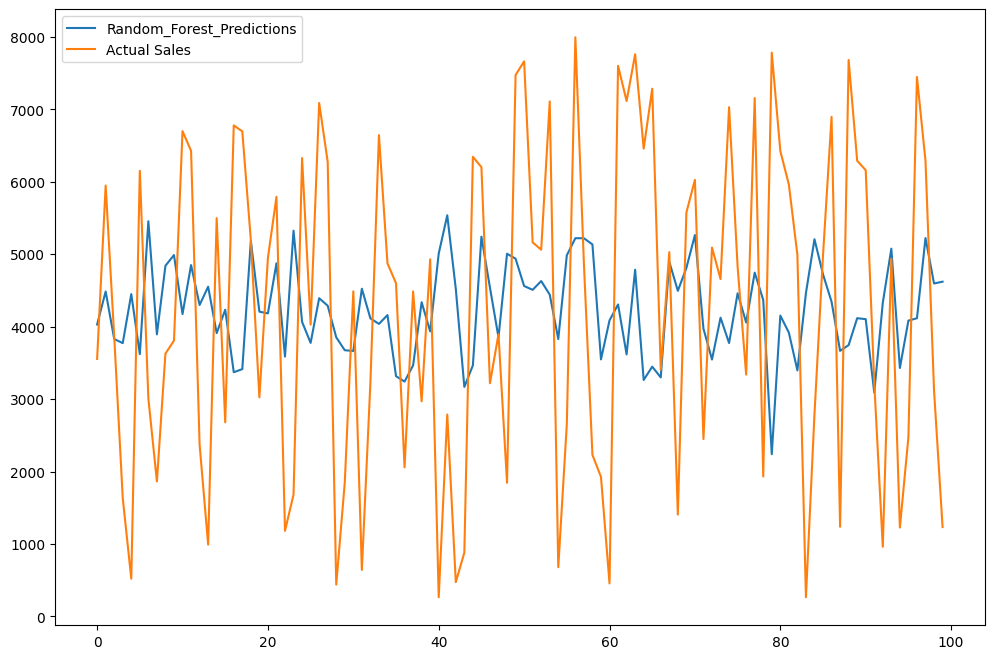

In [100]:
sx_train,sx_test,sy_train,sy_test=final_sx[:-100],final_sx[-100:],sy[:-100],sy[-100:]
model.fit(sx_train,sy_train)

sx1,sx2,sx3,sy=df1['Sale_LastMonth'],df1['Sale_2Monthsback'],df1['Sale_3Monthsback'],df1['Sales']
sx1,sx2,sx3,sy=np.array(sx1),np.array(sx2),np.array(sx3),np.array(sy)
sx1,sx2,sx3,sy=sx1.reshape(-1,1),sx2.reshape(-1,1),sx3.reshape(-1,1),sy.reshape(-1,1)
final_sx=np.concatenate((sx1,sx2,sx3),axis=1)

pred=model.predict(sx_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(sy_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()



C:\Users\Kaushik\AppData\Local\Temp\ipykernel_14884\1485839496.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(px_train,py_train)


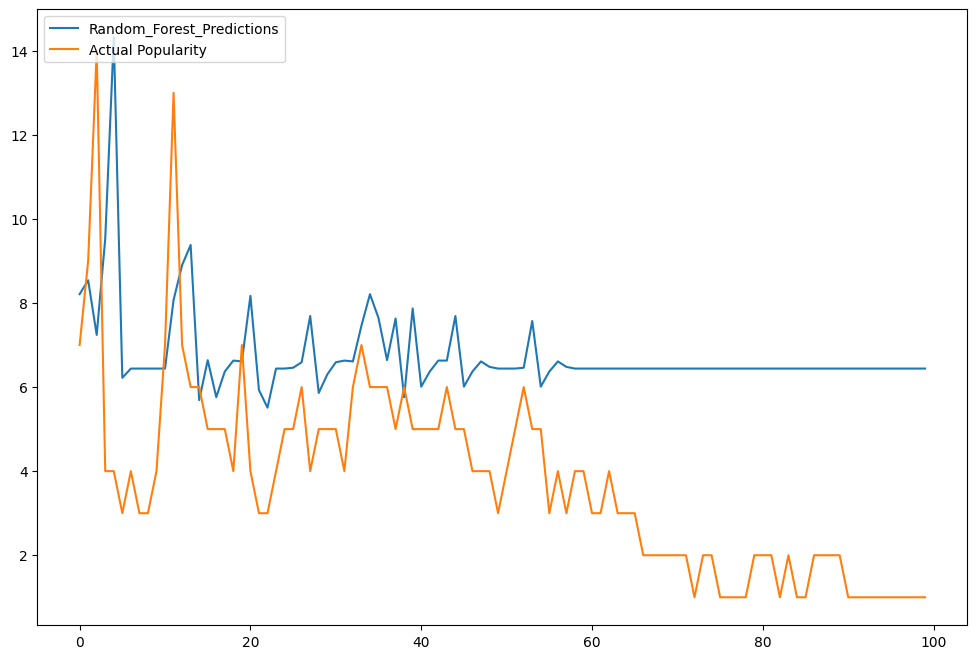

In [98]:

px1,px2,px3,py=df2['Pop_LastMonth'],df2['Pop_2Monthsback'],df2['Pop_3Monthsback'],df2['Popularity']
px1,px2,px3,py=np.array(px1),np.array(px2),np.array(px3),np.array(py)
px1,px2,px3,py=px1.reshape(-1,1),px2.reshape(-1,1),px3.reshape(-1,1),py.reshape(-1,1)
final_px=np.concatenate((px1,px2,px3),axis=1)

px_train,px_test,py_train,py_test=final_px[:-100],final_px[-100:],py[:-100],py[-100:]
model.fit(px_train,py_train)

pred=model.predict(px_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(py_test,label='Actual Popularity')
plt.legend(loc="upper left")
plt.show()